In [1]:
import pandas as pd 
email = pd.read_csv('emails.csv', encoding = "ISO-8859-1")

email.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [2]:
email.isna().sum()

text    0
spam    0
dtype: int64

In [3]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


Data Cleaning.

In [4]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[0-9" "]+', " ", text)
    text = re.sub('[''""...]', '', text)
    return text

clean= lambda x: clean_text(x)

In [5]:
email['text'] = email.text.apply(clean)
email.text

0       subject naturally irresistible your corporate ...
1       subject the stock trading gunslinger fanny is ...
2       subject unbelievable new homes made easy im wa...
3       subject color printing special request additio...
4       subject do not have money get software cds fro...
                              ...                        
5723    subject re research and development charges to...
5724    subject re receipts from visit jim thanks agai...
5725    subject re enron case study update wow all on ...
5726    subject re interest david please call shirley ...
5727    subject news aurora update aurora version the ...
Name: text, Length: 5728, dtype: object

Word Frequency

In [6]:
word_freq = pd.Series(' '.join(email['text']).split()).value_counts()[:20]
word_freq

the        50082
to         41716
and        27467
of         23741
a          19937
you        19147
in         17965
i          17416
for        16690
enron      13218
on         12710
is         12584
ect        11410
subject    10170
this       10027
that        9283
your        9273
be          9259
with        8851
we          8683
dtype: int64

Stopwords Removal

In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
email['text'] = email['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [8]:
word_freq_stopword = pd.Series(' '.join(email['text']).split()).value_counts()[:20]
word_freq_stopword

enron          13218
ect            11410
subject        10170
vince           8420
hou             5577
com             5269
please          4963
kaminski        4659
would           4424
cc              3896
j               3647
pm              3286
research        2733
time            2731
thanks          2583
know            2545
may             2461
group           2373
information     2293
new             2275
dtype: int64

Count Vectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
vectorizer = CountVectorizer(min_df = 0.1, max_df= 0.9)
X = vectorizer.fit_transform(email['text'])
word_freq_df = pd.DataFrame({'term':vectorizer.get_feature_names(), 'occurrences': np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])


In [10]:
word_freq_df.head()

,term,occurrences,frequency
0,also,1863,0.010000
1,attached,912,0.004895
2,available,995,0.005341
3,back,846,0.004541
4,best,1287,0.006908


TFiDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english', max_features=1000, max_df = 0.5, smooth_idf=True)
doc_vec = vect.fit_transform(email['text'])
names_features = vect.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()

df = pd.DataFrame(denselist, columns  = names_features)

df

,ability,able,access,account,accounting,act,action,activities,actual,add,...,writing,wrote,www,yahoo,year,years,yes,yesterday,york,zimin
0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
1,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.65814,0.0,0.0,0.0
2,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
3,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
4,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723,0.000000,0.07628,0.000000,0.0,0.111377,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
5724,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
5725,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.074526,0.067738,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
5726,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0


Bi-Gram Function

In [12]:
def get_top2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=1000).fit(corpus)
    bow = vec1.transform(corpus)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
    return words_freq[:n]

In [13]:
top2_words = get_top2_words(email['text'], n = 200)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=['Bi-gram', "Freq"]
top2_df.head()

,Bi-gram,Freq
0,hou ect,5227
1,ect ect,4881
2,vince kaminski,3990
3,enron com,2090
4,cc subject,2062


[Text(0, 0, 'hou ect'),
 Text(1, 0, 'ect ect'),
 Text(2, 0, 'vince kaminski'),
 Text(3, 0, 'enron com'),
 Text(4, 0, 'cc subject'),
 Text(5, 0, 'kaminski hou'),
 Text(6, 0, 'ect cc'),
 Text(7, 0, 'enron enron'),
 Text(8, 0, 'let know'),
 Text(9, 0, 'would like'),
 Text(10, 0, 'shirley crenshaw'),
 Text(11, 0, 'enron communications'),
 Text(12, 0, 'corp enron'),
 Text(13, 0, 'http www'),
 Text(14, 0, 'please let'),
 Text(15, 0, 'kaminski enron'),
 Text(16, 0, 'com cc'),
 Text(17, 0, 'ect subject'),
 Text(18, 0, 'lon ect'),
 Text(19, 0, 'research group')]

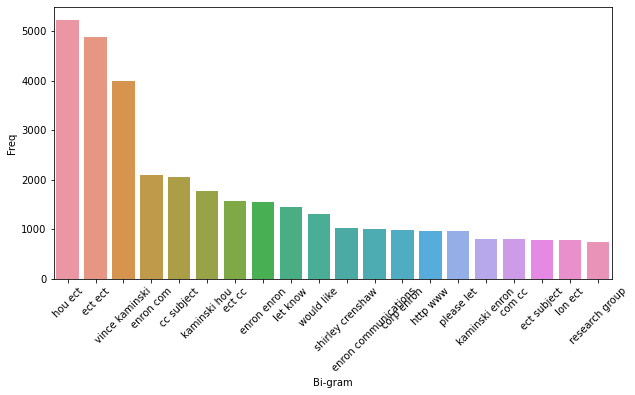

In [14]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10,5))
plot = sns.barplot(x = top20_bigram['Bi-gram'], y = top20_bigram['Freq'])
plot.set_xticklabels(rotation = 45, labels = top20_bigram['Bi-gram'])

Tri-Gram

In [15]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bow = vec1.transform(corpus)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
    return words_freq[:n]

In [16]:
top3_words = get_top_n3_words(email['text'], n = 200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=['Tri-gram', "Freq"]
top3_df.head()

,Tri-gram,Freq
0,hou ect ect,4118
1,vince kaminski hou,1778
2,kaminski hou ect,1778
3,ect ect cc,1525
4,please let know,868


[Text(0, 0, 'hou ect ect'),
 Text(1, 0, 'vince kaminski hou'),
 Text(2, 0, 'kaminski hou ect'),
 Text(3, 0, 'ect ect cc'),
 Text(4, 0, 'please let know'),
 Text(5, 0, 'ect cc subject'),
 Text(6, 0, 'corp enron enron'),
 Text(7, 0, 'vince kaminski enron'),
 Text(8, 0, 'ect ect subject'),
 Text(9, 0, 'lon ect ect'),
 Text(10, 0, 'enron com cc'),
 Text(11, 0, 'kaminski enron com'),
 Text(12, 0, 'cc vince kaminski'),
 Text(13, 0, 'pm vince kaminski'),
 Text(14, 0, 'com cc subject'),
 Text(15, 0, 'hou ect pm'),
 Text(16, 0, 'enron communications enron'),
 Text(17, 0, 'shirley crenshaw hou'),
 Text(18, 0, 'crenshaw hou ect'),
 Text(19, 0, 'communications enron communications')]

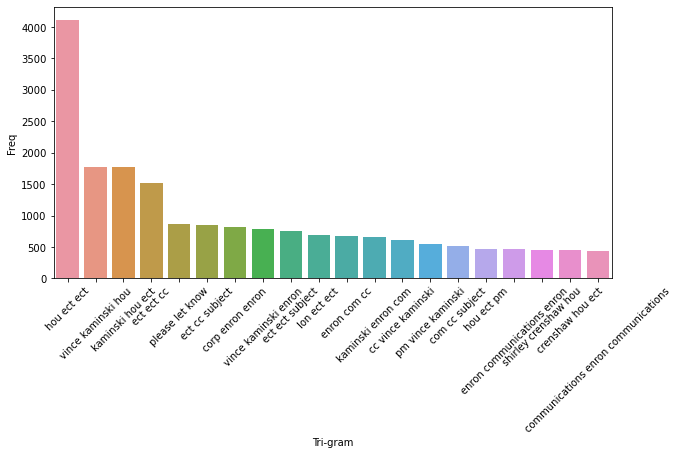

In [17]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10,5))
plot = sns.barplot(x = top20_trigram['Tri-gram'], y = top20_trigram['Freq'])
plot.set_xticklabels(rotation = 45, labels = top20_trigram['Tri-gram'])

In [20]:
'''string_Total = "".join(email['text'])
#wordcloud for entire corpus. 
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
    background_color= 'black',
    width = 1800,
    height = 1500).generate(string_Total)

plt.imshow(wordcloud_stw)'''


'string_Total = "".join(email[\'text\'])\n#wordcloud for entire corpus. \nfrom wordcloud import WordCloud\nwordcloud_stw = WordCloud(\n    background_color= \'black\',\n    width = 1800,\n    height = 1500).generate(string_Total)\n\nplt.imshow(wordcloud_stw)'

In [21]:
def split_into_words(i):
    return (i.split(" "))

In [22]:
from sklearn.model_selection import train_test_split

email_train, email_test = train_test_split(email, test_size = 0.30)


In [23]:
#Create the count vectorizer. 
#preparing email texts into word count matric format. 
email_bow = CountVectorizer(analyzer= split_into_words).fit(email.text)

In [24]:
 #Transform the data and put it under a new variable. 
 all_email_matrix = email_bow.transform(email.text)
 all_email_matrix.shape

(5728, 33564)

In [25]:
#for training messages
train_email_matrix  = email_bow.transform(email_train.text)
train_email_matrix.shape

(4009, 33564)

In [28]:
test_email_matrix = email_bow.transform(email_test.text)
test_email_matrix.shape

(1719, 33564)

In [29]:
#prep naive bayes model on training data set
#Without TFiDf matrices 
#Building it using MultinomialNB and GaussianNB
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB 

classifier_mb = MB()
classifier_mb.fit(train_email_matrix, email_train.spam)
train_pred_m = classifier_mb.predict(train_email_matrix)
score_train_MB = classifier_mb.score(train_email_matrix, email_train.spam)
print(score_train_MB)

test_pred_mb = classifier_mb.predict(test_email_matrix)
score_test_MB = classifier_mb.score(test_email_matrix, email_test.spam)
print(score_test_MB)




0.9970067348465952
0.9918557300756253


In [30]:
#Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(train_email_matrix.toarray(), email_train.spam.values) #  need to convert tfidf into array format which id compatible 
train_pred_g = classifier_gb.predict(train_email_matrix.toarray())

train_score_g = np.mean(train_pred_g == email_train.spam)

print(train_score_g)


0.9955101022698928


In [31]:

test_pred_g = classifier_gb.predict(test_email_matrix.toarray())
score_test_g = np.mean(test_pred_g ==email_test.spam)
 
print(score_test_g)

0.9616055846422339


MB and GB with TFiDF

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer().fit(all_email_matrix)

train_tfidf = tfidf.transform(train_email_matrix)

test_tfidf = tfidf.transform(test_email_matrix)



In [33]:
#MB
classifier_mb = MB()
classifier_mb.fit(train_tfidf, email_train.spam)
train_tfidf_pred_m = classifier_mb.predict(train_tfidf)

score_train_tfidf_MB = np.mean(train_tfidf_pred_m==email_train.spam)
print(score_train_tfidf_MB)

test_tfidf_pred_mb = classifier_mb.predict(test_tfidf)
score_test_tfidf_MB = np.mean(test_tfidf_pred_mb == email_test.spam)
print(score_test_tfidf_MB)

0.9266650037415815
0.9016870273414777


In [34]:
 #GB
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(), email_train.spam.values) #  need to convert tfidf into array format which id compatible 
train_tfidf_pred_g = classifier_gb.predict(train_tfidf.toarray())

train_tfidf_score_g = np.mean(train_tfidf_pred_g == email_train.spam)

print(train_tfidf_score_g)


test_tfidf_pred_g = classifier_gb.predict(test_tfidf.toarray())
test_tfidf_score_g = np.mean(test_tfidf_pred_g == email_test.spam)
print(test_tfidf_score_g)



0.9975056123721626
0.9604421175101804
